<h1 style="color:DarkBlue;">Prediction of Automobile insurance Claim</h1><h4 style="color:Navy;">presented by  Mrinmoyee Mondal</h4>

### Overview:
Insurance company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer.

About the dataset: This is imbalanced dataset . Here 0 - Claim was not made, 1 - Claim made.

Objective: better understanding of how to deal with imbalanced dataset. 

In this project, following concepts have been applied.

- 1.Train-test split
- 2.Standard scaler
- 3.Logistic Regression
- 4.SMOTE
- 5.feature scaling

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [55]:
# Code starts here
# Code starts here
train = pd.read_csv('train.csv')
train.head(5)

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,...,1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,2533,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,...,16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,9169,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,...,13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,4174,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,...,4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,10150,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,...,1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


In [56]:
print(train.shape)
print(train.info())
print(train.describe())

(8241, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8241 non-null   int64  
 1   ID          8241 non-null   int64  
 2   KIDSDRIV    8241 non-null   int64  
 3   AGE         8235 non-null   float64
 4   HOMEKIDS    8241 non-null   int64  
 5   YOJ         7799 non-null   float64
 6   INCOME      7779 non-null   object 
 7   PARENT1     8241 non-null   object 
 8   HOME_VAL    7783 non-null   object 
 9   MSTATUS     8241 non-null   object 
 10  GENDER      8241 non-null   object 
 11  EDUCATION   8241 non-null   object 
 12  OCCUPATION  7711 non-null   object 
 13  TRAVTIME    8241 non-null   int64  
 14  CAR_USE     8241 non-null   object 
 15  BLUEBOOK    8241 non-null   object 
 16  TIF         8241 non-null   int64  
 17  CAR_TYPE    8241 non-null   object 
 18  RED_CAR     8241 non-null   object 
 19  OLDCLAIM    8241

In [57]:
test = pd.read_csv('test.csv')
print(test.shape)
print(test.info())

(2061, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2061 non-null   int64  
 1   ID          2061 non-null   int64  
 2   KIDSDRIV    2061 non-null   int64  
 3   AGE         2060 non-null   float64
 4   HOMEKIDS    2061 non-null   int64  
 5   YOJ         1955 non-null   float64
 6   INCOME      1953 non-null   object 
 7   PARENT1     2061 non-null   object 
 8   HOME_VAL    1944 non-null   object 
 9   MSTATUS     2061 non-null   object 
 10  GENDER      2061 non-null   object 
 11  EDUCATION   2061 non-null   object 
 12  OCCUPATION  1926 non-null   object 
 13  TRAVTIME    2061 non-null   int64  
 14  CAR_USE     2061 non-null   object 
 15  BLUEBOOK    2061 non-null   object 
 16  TIF         2061 non-null   int64  
 17  CAR_TYPE    2061 non-null   object 
 18  RED_CAR     2061 non-null   object 
 19  OLDCLAIM    2061

In [58]:
def impute_null_values(train_data,test_data,column,imputer_type):
    mean_imputer = SimpleImputer(strategy='mean')
    mode_imputer = SimpleImputer(strategy='most_frequent')
    for n in range(0,len(column)):
        if(imputer_type == 'mean'):        
            mean_imputer.fit(train_data[[column[n]]])
            train_data[column[n]] = mean_imputer.transform(train_data[[column[n]]])
            test_data[column[n]] = mean_imputer.transform(test_data[[column[n]]])
        elif(imputer_type == 'mode'):
            mode_imputer.fit(train[[column[n]]])
            train_data[column[n]]=mode_imputer.transform(train_data[[column[n]]])
            test_data[column[n]]=mode_imputer.transform(test_data[[column[n]]])
    return train_data,test_data

In [59]:
def removal_unwanted_char(data,column,char):
    for n in range(0,len(column)):
        for i in range(0,len(char)):
            data[column[n]] = data[column[n]].str.replace(char[i],'')
    return data

In [60]:
def change_dtype(data,column,to_type):
    for n in range(0,len(column)):
        data = data.astype({column[n]: to_type})
    return data

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [61]:
# Code starts here
columns = ['INCOME','HOME_VAL','OLDCLAIM','CLM_AMT','BLUEBOOK']
signs = ['$',',']

train = removal_unwanted_char(train,columns,signs)
test = removal_unwanted_char(test,columns,signs)
#print(train.head(5))

In [62]:
columns_mean = ['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE']
train,test = impute_null_values(train,test,columns_mean,'mean')
columns_mode = ['OCCUPATION']
train,test = impute_null_values(train,test,columns_mode,'mode')
print(train.isnull().sum().values.sum())
print(test.isnull().sum().values.sum())

0
0


In [63]:
train = change_dtype(train,columns,float)
test = change_dtype(test,columns,float)
print(train.dtypes)

Unnamed: 0      int64
ID              int64
KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
dtype: object


In [64]:
# choose categorical and continuous features from data

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']
numerical_columns: ['Unnamed: 0', 'ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


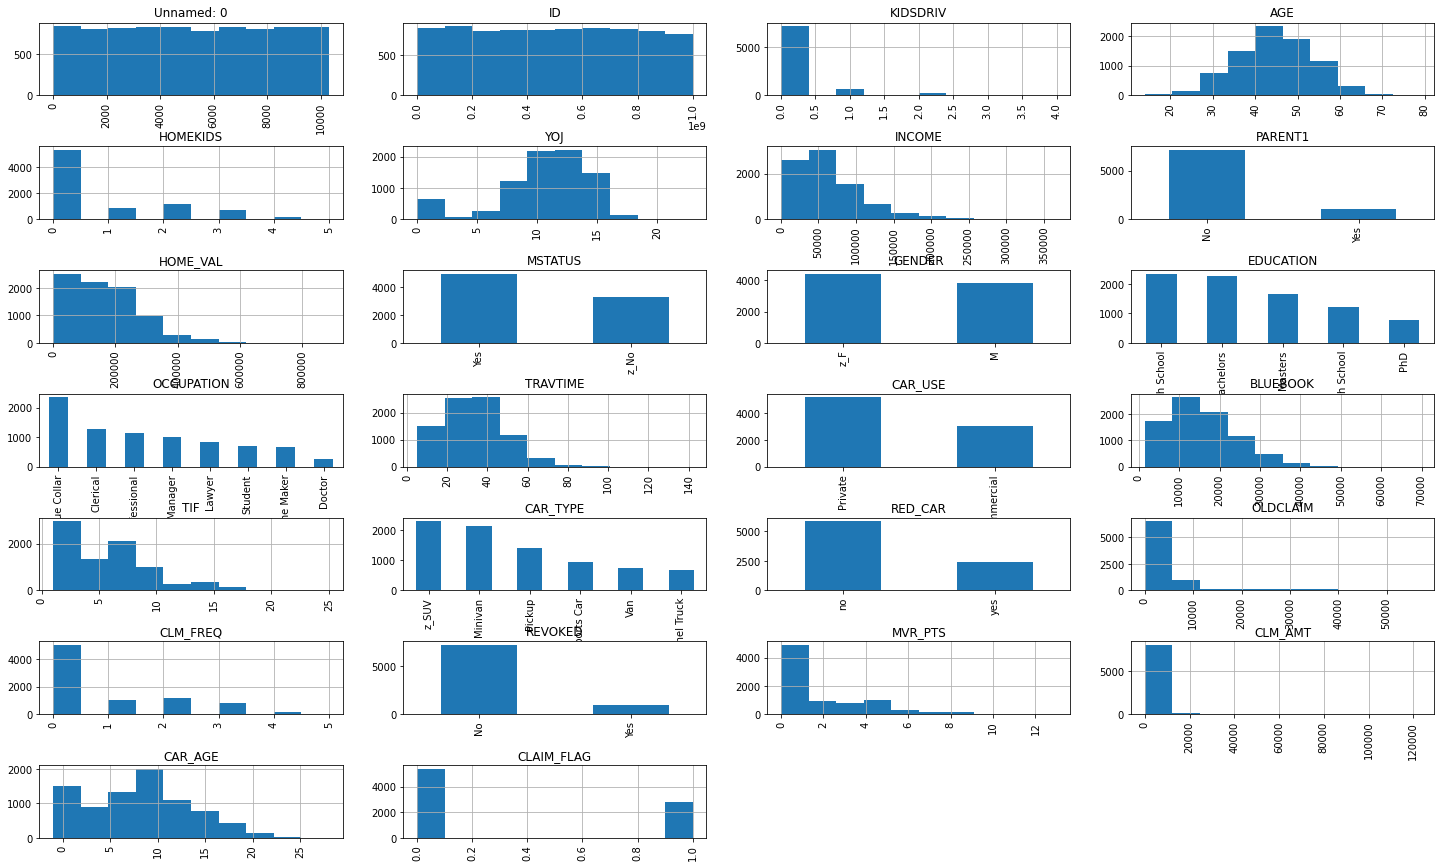

In [65]:

fig = plt.figure(figsize=(25, 15))
cols = 4
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


In [66]:
le = LabelEncoder()

for x in categorical_columns:
    train[x] = le.fit_transform(train[x].astype(str))
    if x in [c for c in test.columns 
                       if test[c].dtype.name == 'object']:
        test[x] = le.transform(test[x].astype(str))

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [28]:
# Code Starts here
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

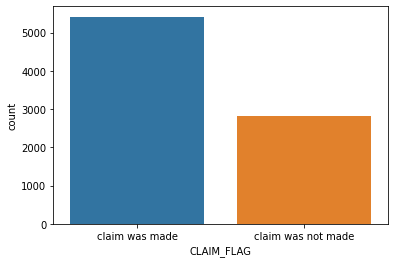

In [77]:
g = sns.countplot(y)
g.set_xticklabels(['claim was made','claim was not made'])
plt.show()

In [78]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_val) 
print("Decision tree f1 score: ",f1_score(y_val,tree_predictions))

Decision tree f1 score:  0.7335858585858586


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, tree_predictions)

array([[1470,  107],
       [ 315,  581]], dtype=int64)

In [30]:
smote=SMOTE(random_state=0)
X_sample, y_sample=smote.fit_resample(X_train, y_train)

In [81]:
print(X_sample.shape, y_sample.shape)

(7674, 25) (7674,)


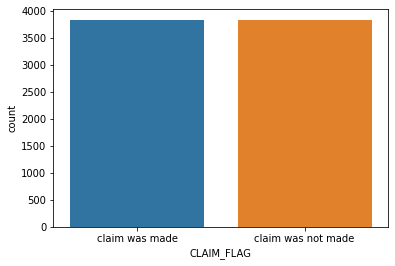

In [80]:
g = sns.countplot(y_sample)
g.set_xticklabels(['claim was made','claim was not made'])
plt.show()

In [82]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=17)
tree1.fit(X_sample, y_sample)

tree_predictions = tree1.predict(X_val) 
print("Decision tree f1 score: ",f1_score(y_val,tree_predictions))
print(confusion_matrix(y_val, tree_predictions))

Decision tree f1 score:  0.7400881057268722
[[1472  105]
 [ 308  588]]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [45]:
# Code Starts here

# Storing the id from the test file
id_ = test['ID']

# Predict on the test data
y_pred_test = tree1.predict(test)

# Create a sample submission file
final_submission = pd.DataFrame({'':id_,'CLAIM_FLAG':y_pred_test})


# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here